
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

data_path = "./data/"
house = pd.read_csv(data_path + "houseprice.csv")

In [2]:
# 데이타 미리보기
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


In [3]:
# 데이타 기초통계 미리보기
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,27.0,19.250000,7.153751,12.95,14.9750,18.450,20.375,42.450
tax,27.0,144.898815,57.640439,77.82,103.6000,121.862,166.071,308.404
ground,27.0,63.475556,24.036766,22.75,47.2165,58.500,75.631,128.000
floor,27.0,30.241481,11.165303,19.50,23.7500,29.760,33.160,68.400
year,27.0,3.648148,1.405311,0.30,3.0000,4.000,4.700,6.200


#### 1. 주택 가격과 세금 간의 산점도 행렬과 상관계수를 구하시오. 두 변수 간의 선형관계가 존재하는가? 산점도 행렬을 보면 3개의 특이한 관측치가 나타난다. 이들 값의 특성은 무엇인가?

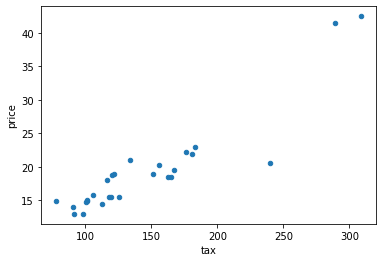

In [4]:
# 산점도 행렬
house.plot.scatter('tax','price')
plt.show()

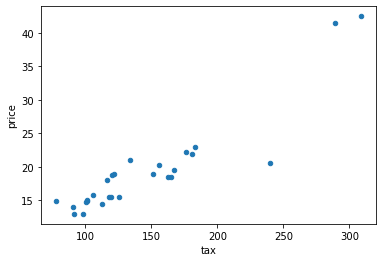

In [5]:
# 산점도 행렬 - 다른 방법으로 그려보기 - 검증
house.plot(x="tax", y="price", kind="scatter")
plt.show()

In [6]:
# 상관계수 : 피어슨 상관계수 (선형성 강약 여부 - 강하다면 변수들의 관계가 직선에 의해 잘 모델링된다)
stats.pearsonr(house.tax,house.price)

(0.9152494654674048, 2.3100385419897196e-11)

In [7]:
# 상관계수 : 스피어만 상관계수 
# (단조성 여부 - 좋다면 한 변수의 값의 크기가 커지면(또는 작아지면) 다른 변수의 크기도 커진다(또는 작아진다))
stats.spearmanr(house.tax,house.price)

SpearmanrResult(correlation=0.9219492531314523, pvalue=8.562708749005674e-12)

- 피어슨 상관계수에 의하여 선형관계 존재하는 것으로 판단됨.
- 250근처와 300 근처의 3개의 특이한 관측치는 price, tax의 선형회귀모형을 결정하는데 큰 역할을 한다.
- 250근처와 300 근처의 값이 있을 때와 없을 때에 따라 선형회귀모형의 기울기(회귀식)가 매우 많이 달라질 수 있다. 즉, 양의 상관관계 정도가 달라진다.

#### 2. 주택 가격을 종속변수로 하고 세금을 설명변수로 하는 단순선형회귀모형을 적합하여 적합된 회귀식을 쓰시오. 

In [9]:
# 선형회귀식을 구하기 위한 
model = smf.ols('price ~ tax', data = house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     129.0
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           2.31e-11
Time:                        21:50:42   Log-Likelihood:                -66.382
No. Observations:                  27   AIC:                             136.8
Df Residuals:                      25   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7907      1.556      1.794      0.085      -0.413       5.994
tax            0.1136      0.010     11.359      0.000       0.093       0.134
==============================================================================
Omnibus:                       11.576   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.951
Skew:                          -0.909   Prob(JB):                     0.000935
Kurtosis:                       6.016   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 회귀식  
y_hat = 2.7907 + 0.1136*x

#### 3. tax의 계수에 대한 95% 신뢰구간을 계산하고 해석하시오. 

In [10]:
# 95% 신뢰구간
model.conf_int(alpha=0.05)

,0,1
Intercept,-0.412993,5.994431
tax,0.092995,0.134188


tax값이 0일 경우 price 범위는 -0.412993 ~ 5.994431 (유의미하지 않음)  
tax값이 1이 증가할 경우 price 증가범위는 0.092995 ~ 0.134188 이라고 95% 신뢰함

#### 4. tax의 계수에 대한 가설검정을 진행하시오. 

#### 가설설정
- H0: β1 = 0 (회귀직선은 의미가 없다)  
- H1: β1[](http://) != 0 (회귀직선은 의미가 있다)

#### 검정통계량 계산  

In [11]:
model.pvalues

Intercept    8.491101e-02
tax          2.310039e-11
dtype: float64

- 0.05 유의수준 하에서 귀무가설 기각. 회귀직선은 의미가 있다. (두 변수가 상관있다)

#### 5. 모형의 R-square는 몇 인가? 그것의 의미는 무엇인가?

In [12]:
# 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도
model.rsquared

0.8376815840383705

- 1에 가깝기 때문에 추정한 선형모형이 주어진 자료에 잘 적합한다고 할 수 있으며,
- tax 변동량 중에서 적용한 모형으로 price를 설명가능한 부분의 비율이 83.7%임을 알 수 있다.

#### 6. tax가 중위수인 집의 가격을 예측하려고 한다. 신뢰구간과 예측구간을 구하고 각 구간의 의미를 해석하시오. 

In [13]:
# tax가 중위수인 집의 가격 정보
pred = model.get_prediction(exog = {'tax': house.tax.median() } )
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.633213,0.610771,15.375306,17.891119,10.450429,22.815996


- 신뢰구간: tax가 중위수값 일 경우  price는 15.375306 ~	17.891119 사이일 것으로 95% 확신합니다.
- 예측구간: tax가 중위수값일 경우 price는 10.450429 ~ 22.815996 사이일 것으로 실제 값 범위외이지만 95% 확신합니다.